In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
#from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import mean_squared_error
import physt
from physt import h1, h2, histogramdd

Using TensorFlow backend.
/Users/viraj/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/viraj/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/viraj/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
dataset = np.loadtxt('dataoptions.csv', delimiter=',')  #[ Stock | Strike | r | sigma | time | call]

In [3]:
dataset[0]

array([9.99529680e+01, 6.00000000e+01, 1.00000000e-02, 5.00000000e-02,
       5.75342466e-01, 4.02971823e+01])

In [5]:
np.random.shuffle(dataset)

In [6]:
dataset[0]

array([9.69451363e+01, 1.40000000e+02, 9.00000000e-02, 1.50000000e-01,
       2.02739726e-01, 1.64252413e-07])

In [7]:
15000000*0.8*0.25  #validation samples

3000000.0

In [8]:
15000000*0.2 #testing samples

3000000.0

In [9]:
df_full=pd.DataFrame(data=dataset,
                index=[i for i in range(dataset.shape[0])],columns=['Stock','Strike','Risk-free','Volatility','Time','Option'])

In [10]:
df_full.head(10)

,Stock,Strike,Risk-free,Volatility,Time,Option
0,96.945136,140.0,0.09,0.150,0.202740,1.642524e-07
1,88.778764,150.0,0.08,0.500,0.224658,1.571846e-01
2,117.265074,70.0,0.09,0.175,0.268493,4.893631e+01
3,121.053796,60.0,0.08,0.600,1.093151,6.853838e+01
4,100.247186,150.0,0.05,0.300,0.542466,4.852771e-01
5,80.731767,80.0,0.02,0.600,0.147945,7.866025e+00
6,105.247653,90.0,0.07,0.050,1.290411,2.302089e+01
7,103.188866,70.0,0.10,0.400,0.498630,3.720032e+01
8,121.155872,70.0,0.03,0.250,0.257534,5.169462e+01
9,111.921049,110.0,0.03,0.450,0.509589,1.591930e+01


In [11]:
df_full["Stock"] = df_full["Stock"]/df_full["Strike"]
df_full["Option"] = df_full["Option"]/df_full["Strike"]

In [12]:
df_full.head(10)

,Stock,Strike,Risk-free,Volatility,Time,Option
0,0.692465,140.0,0.09,0.150,0.202740,1.173232e-09
1,0.591858,150.0,0.08,0.500,0.224658,1.047897e-03
2,1.675215,70.0,0.09,0.175,0.268493,6.990901e-01
3,2.017563,60.0,0.08,0.600,1.093151,1.142306e+00
4,0.668315,150.0,0.05,0.300,0.542466,3.235181e-03
5,1.009147,80.0,0.02,0.600,0.147945,9.832531e-02
6,1.169418,90.0,0.07,0.050,1.290411,2.557877e-01
7,1.474127,70.0,0.10,0.400,0.498630,5.314332e-01
8,1.730798,70.0,0.03,0.250,0.257534,7.384946e-01
9,1.017464,110.0,0.03,0.450,0.509589,1.447209e-01


In [13]:
n_samples=int(dataset.shape[0]/10)
#df=df_full.sample(n=n_samples)
df=df_full[:n_samples]
print("Number of samples taken from the dataset= ", n_samples)

Number of samples taken from the dataset=  1500000


In [14]:
df.shape

(1500000, 6)

In [15]:
n_train=int(0.8*n_samples)
X_train=df[['Stock','Risk-free','Volatility','Time']][0:n_train].to_numpy()
y_train=df[['Option']][0:n_train].to_numpy()
X_test=df[['Stock','Risk-free','Volatility','Time']][n_train:].to_numpy()
y_test=df[['Option']][n_train:].to_numpy()

In [16]:
backend.clear_session()

In [17]:
def output_activation(x):
    return backend.exp(x)

In [18]:
nodes = 250
model = Sequential()
model.add(Dense(nodes, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.2))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation(output_activation))
          
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse', 'mae', 'mape', 'cosine'])


In [19]:
for m in model.layers:
    print(m.name, m.input_shape,'---->',m.output_shape)

print(model.summary())


dense_1 (None, 4) ----> (None, 250)
leaky_re_lu_1 (None, 250) ----> (None, 250)
dropout_1 (None, 250) ----> (None, 250)
dense_2 (None, 250) ----> (None, 250)
dropout_2 (None, 250) ----> (None, 250)
dense_3 (None, 250) ----> (None, 250)
dropout_3 (None, 250) ----> (None, 250)
dense_4 (None, 250) ----> (None, 1)
activation_1 (None, 1) ----> (None, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               1250      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 250)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________

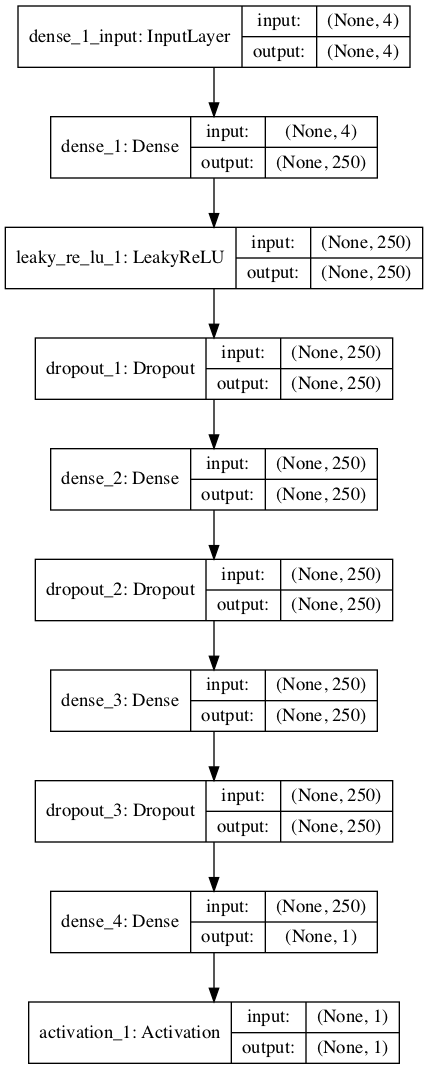

In [20]:
from keras.utils import plot_model
#plot_model(model, to_file='model.png') #install pydot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
filepath="epoch-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,save_best_only=False, mode='auto', period=1)
history= model.fit(X_train, y_train, batch_size=200, epochs=20, validation_split=0.25, verbose=2,callbacks=[checkpoint])


Train on 900000 samples, validate on 300000 samples
Epoch 1/20
 - 57s - loss: 0.0035 - mse: 0.0035 - mae: 0.0298 - mape: 383857.9375 - cosine: 0.9420 - val_loss: 2.8097e-04 - val_mse: 2.8097e-04 - val_mae: 0.0065 - val_mape: 22318.3320 - val_cosine: 0.9420

Epoch 00001: saving model to epoch-01-0.0003.hdf5
Epoch 2/20
 - 56s - loss: 0.0012 - mse: 0.0012 - mae: 0.0203 - mape: 25202.9648 - cosine: 0.9420 - val_loss: 6.4959e-04 - val_mse: 6.4959e-04 - val_mae: 0.0198 - val_mape: 19519.5742 - val_cosine: 0.9420

Epoch 00002: saving model to epoch-02-0.0006.hdf5
Epoch 3/20
 - 55s - loss: 0.0010 - mse: 0.0010 - mae: 0.0189 - mape: 16601.0117 - cosine: 0.9420 - val_loss: 6.3170e-04 - val_mse: 6.3170e-04 - val_mae: 0.0123 - val_mape: 5134.8281 - val_cosine: 0.9420

Epoch 00003: saving model to epoch-03-0.0006.hdf5
Epoch 4/20
 - 55s - loss: 9.9889e-04 - mse: 9.9889e-04 - mae: 0.0180 - mape: 12294.8447 - cosine: 0.9419 - val_loss: 7.6660e-04 - val_mse: 7.6660e-04 - val_mae: 0.0082 - val_mape: 73

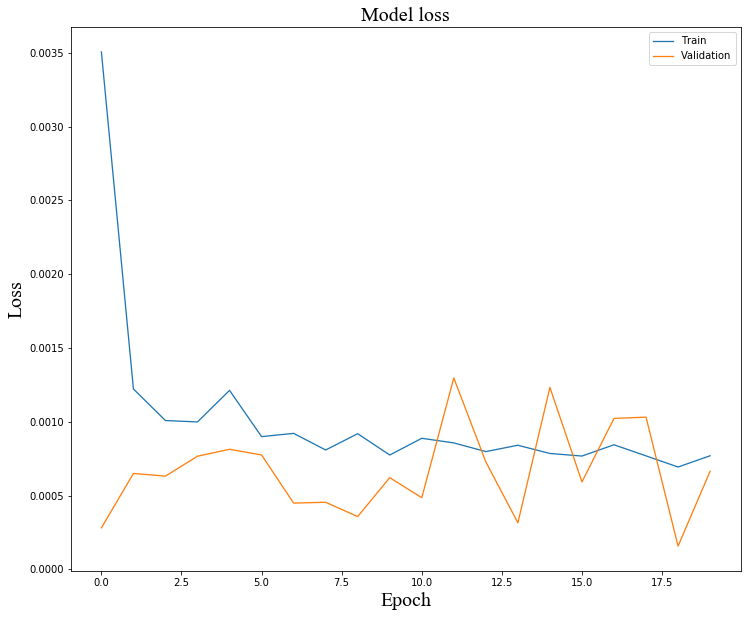

In [159]:
plt.figure(figsize=(12 ,10))
plt.plot(history.history['loss'],linewidth=1.3)
plt.plot(history.history['val_loss'],linewidth=1.3)
plt.title('Model loss',fontsize=20,fontname='Times New Roman')
plt.ylabel('Loss',fontsize=20,fontname='Times New Roman')
plt.xlabel('Epoch',fontsize=20,fontname='Times New Roman')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [23]:
y_test_hat = model.predict(X_test)
y_test_hat = np.squeeze(y_test_hat)

In [24]:
y_test_hat.shape

(300000,)

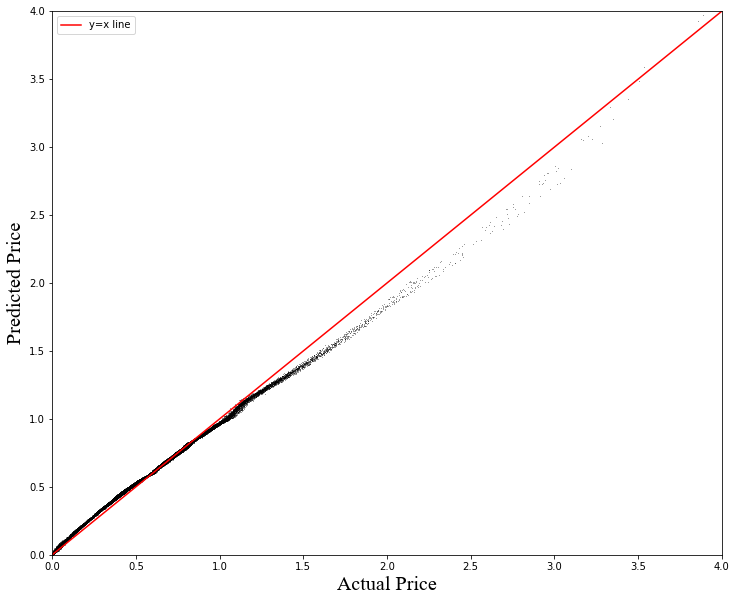

In [25]:
plt.figure(figsize=(12 ,10))
plt.scatter(y_test, y_test_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 

t2 = np.arange(0.0, 5.0, 0.02)

plt.plot(t2,t2,'r',label='y=x line')
axes = plt.gca()
axes.set_xlim([0,4])
axes.set_ylim([0,4])
plt.legend()
plt.show()

In [28]:
y_test=np.squeeze(y_test)

In [29]:
m=mean_squared_error(y_test, y_test_hat)
print("Mean square error on test data=",m)

Mean square error on test data= 0.0006742508870001646


In [56]:
print("Root mean square error on test data=",np.sqrt(m))

Root mean square error on test data= 0.025966341425009504


In [30]:
print(y_test.shape)
print(y_test_hat.shape)


(300000,)
(300000,)


In [94]:
diff=y_test_hat-y_test

In [95]:
diff2=np.square(diff)

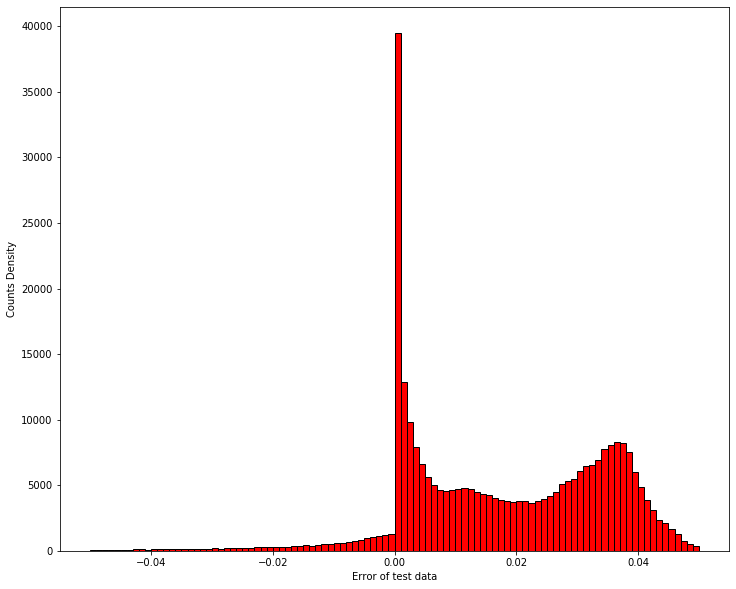

In [96]:
plt.figure(figsize=(12 ,10))
plt.hist(diff, bins=100,edgecolor='black',color='red',range=(-0.05,0.05),density=False)
plt.xlabel('Error of test data')
plt.ylabel('Counts Density')
plt.show()

In [76]:
Strike_test=df[['Strike']][n_train:].to_numpy()
Strike_test=np.squeeze(Strike_test)

In [122]:
Stock_test=df[['Stock']][n_train:].to_numpy()
Stock_test=np.squeeze(Stock_test)
Stock_test=np.multiply(Stock_test,Strike_test)

In [77]:
option_price_true=np.multiply(y_test,Strike_test)
option_price_predicted=np.multiply(y_test_hat,Strike_test)

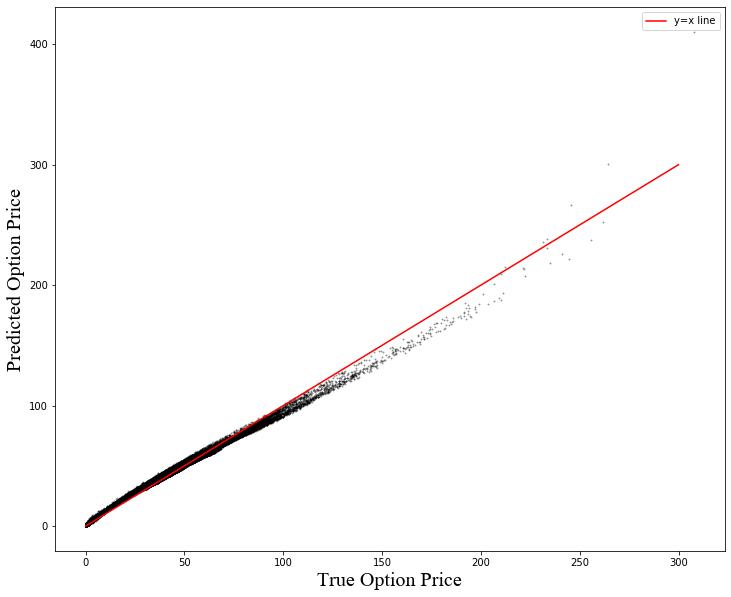

In [82]:
plt.figure(figsize=(12 ,10))
plt.scatter(option_price_true, option_price_predicted,color='black',linewidth=0.3,alpha=0.4, s=2)
plt.xlabel('True Option Price',fontsize=20,fontname='Times New Roman')
plt.ylabel('Predicted Option Price',fontsize=20,fontname='Times New Roman') 
plt.gray()

t2 = np.arange(0.0, 300.0, 0.02)

plt.plot(t2,t2,'r',label='y=x line')
axes = plt.gca()
#axes.set_xlim([0,4])
#axes.set_ylim([0,4])
plt.legend()
plt.show()

## Restricted test data | Actual price<1

In [88]:
# Filtered test data
y_filtered=y_test[np.where(y_test<1)]
print(y_test.shape)
y_filtered_pred=y_test_hat[np.where(y_test<1)]
strike_filtered=Strike_test[np.where(y_test<1)]

(300000,)


In [123]:
stock_filtered=Stock_test[np.where(y_test<1)]

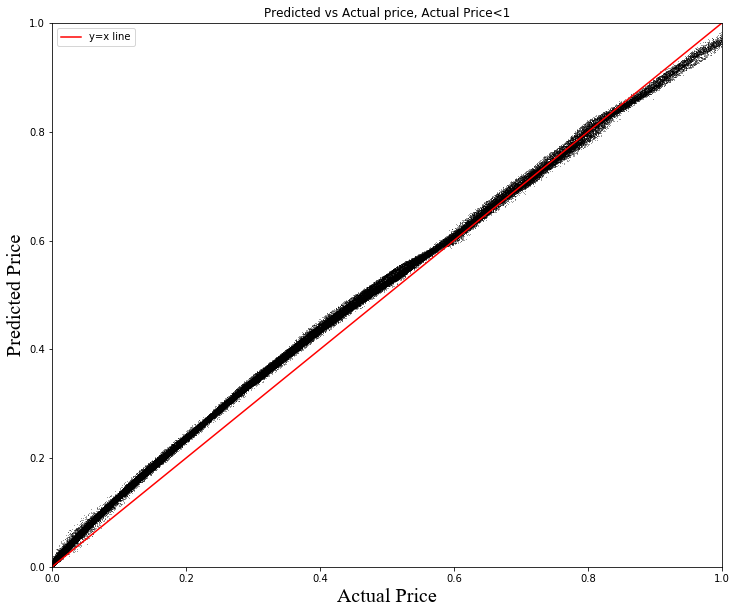

In [90]:
plt.figure(figsize=(12 ,10))
plt.scatter(y_filtered, y_filtered_pred,color='black',linewidth=0.3,alpha=0.4, s=0.5)
plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
plt.title('Predicted vs Actual price, Actual Price<1')

t2 = np.arange(0.0, 5.0, 0.02)

plt.plot(t2,t2,'r',label='y=x line')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.legend()
plt.show()

In [91]:
m2=mean_squared_error(y_filtered, y_filtered_pred)
print("Mean square error on restricted test data=",m2)

Mean square error on restricted test data= 0.0005815125036711305


In [92]:
print("Root mean square error on restricted test data=",np.sqrt(m2))

Root mean square error on restricted test data= 0.02411457036049223


In [97]:
diff_filter=y_filtered_pred-y_filtered

In [98]:
diff2_filter=np.square(diff_filter)

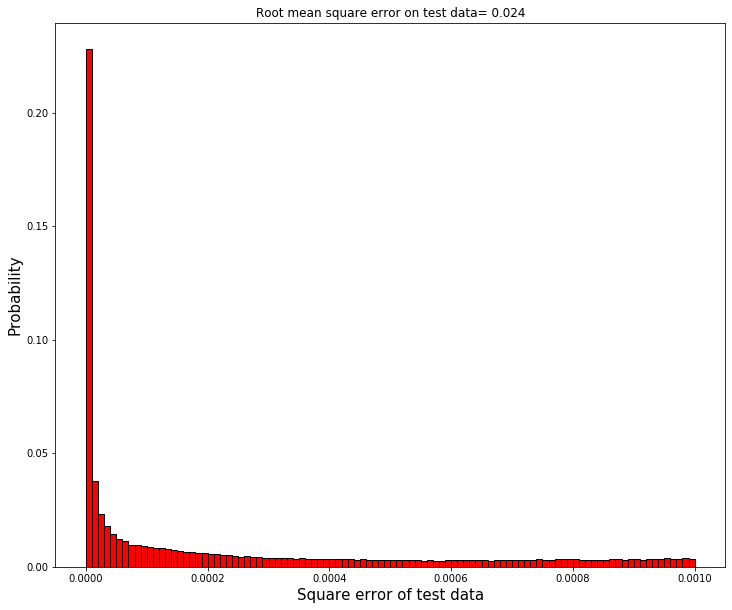

In [147]:
plt.figure(figsize=(12 ,10))
plt.hist(diff2_filter, bins=100,weights=np.ones_like(diff2_filter)/len(diff2_filter),edgecolor='black',color='red',range=(0,0.001),density=False)
plt.xlabel('Square error of test data',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.title('Root mean square error on test data= 0.024')
plt.show()

In [100]:
option_price_true_filter=np.multiply(y_filtered,strike_filtered)
option_price_predicted_filter=np.multiply(y_filtered_pred,strike_filtered)

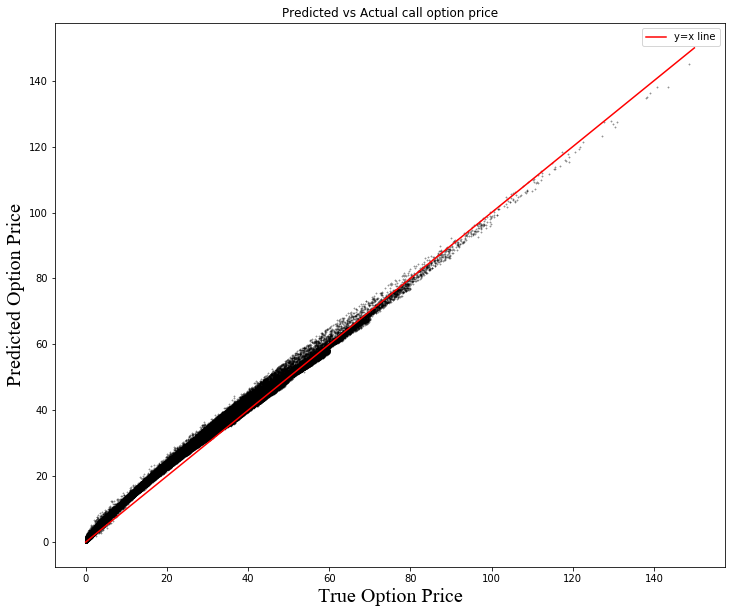

In [119]:
plt.figure(figsize=(12 ,10))
plt.scatter(option_price_true_filter, option_price_predicted_filter,color='black',linewidth=0.3,alpha=0.4, s=2)
plt.xlabel('True Option Price',fontsize=20,fontname='Times New Roman')
plt.ylabel('Predicted Option Price',fontsize=20,fontname='Times New Roman') 
plt.title('Predicted vs Actual call option price')

plt.gray()

t2 = np.arange(0.0, 150.0, 0.02)

plt.plot(t2,t2,'r',label='y=x line')
axes = plt.gca()
#axes.set_xlim([0,4])
#axes.set_ylim([0,4])
plt.legend()
plt.show()

In [103]:
mse_option=mean_squared_error(option_price_true_filter, option_price_predicted_filter)
print("Mean square error on option prices=",mse_option)

Mean square error on option prices= 5.368498541579085


In [104]:
print("Root mean square error on option prices=",np.sqrt(mse_option))

Root mean square error on option prices= 2.317002059036436


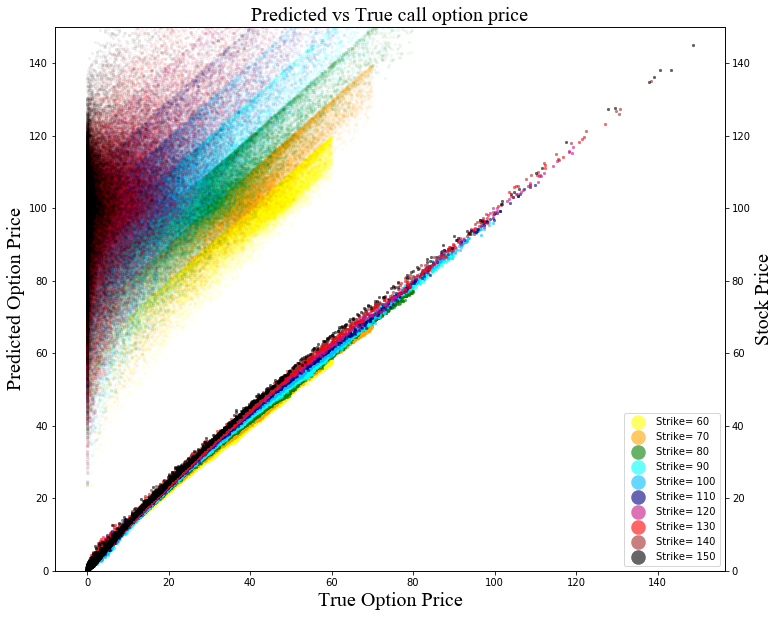

In [155]:
range_strike=np.asarray([60,70,80,90,100,110,120,130,140,150])
color_list=['yellow','orange','green', 'cyan',   'deepskyblue', 'navy',   'mediumvioletred','red', 'brown',  'black']

count=0
fig=plt.figure(figsize=(12 ,10))
ax = fig.add_subplot(1, 1, 1)

for s in range_strike:
    idx=np.where(strike_filtered==s)
    plt.scatter(option_price_true_filter[idx], option_price_predicted_filter[idx],color=color_list[count],linewidth=0.3,alpha=0.6, s=8,label='Strike= %d' %s)
    count=count+1

ax2 = ax.twinx()
ax2.set_ylabel('Stock Price', color='k',fontsize=20,fontname='Times New Roman')
ax2.set_ylim([0,150])
ax.set_ylim([0,150])

count2=0
for s in range_strike:
    idx=np.where(strike_filtered==s)
    ax2.scatter(option_price_true_filter[idx], stock_filtered[idx],color=color_list[count2],linewidth=0.3,alpha=0.05, s=8)
    count2=count2+1


#ax2.scatter(option_price_true_filter,stock_filtered,color='blue',alpha=0.01,s=8)
ax.set_xlabel('True Option Price',fontsize=20,fontname='Times New Roman')
ax.set_ylabel('Predicted Option Price',fontsize=20,fontname='Times New Roman') 
plt.title('Predicted vs True call option price',fontsize=20,fontname='Times New Roman')
#plt.legend()
ax.legend(markerscale=5,loc='lower right')
plt.savefig('result.png')

# References
### Keras:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://keras.io/

### Deep Learning 
https://srdas.github.io/DLBook/

### Batch size and epochs
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

### Activation functions
https://www.machinecurve.com/index.php/2019/09/04/relu-sigmoid-and-tanh-todays-most-used-activation-functions/#rectified-linear-unit-relu
https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02